<img src="ku_logo_uk.png" alt="drawing" width="130" style="float:right"/>

# <span style="color:#2c061f"> Exercise 3 </span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>


####  <span style="color:#d89216"> <br> Simon Guldager </span>

## Plan for today

1. Plotting
2. Optimization
3. Problem set 1

## Important information

This years inaugural project will be oploaded soon. **Deadline for hand-in is march 19th!**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) + 0.05 * x ** 2

In [3]:
# generate the data to draw
xs = np.linspace(-10, 10, 100) # evenly space out 100 points between -10 and 10
ys = [f(x) for x in xs] # for each point, apply f(x)

print(xs[:10])
print(ys[:10])

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818]
[5.5440211108893696, 5.164619139736901, 4.774468860692549, 4.381471187789181, 3.993808846213567, 3.6196135518407364, 3.2666352654979995, 2.9419269745612358, 2.651557822934307, 2.4003662574331748]


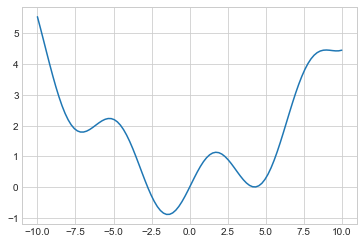

In [4]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xs, ys)

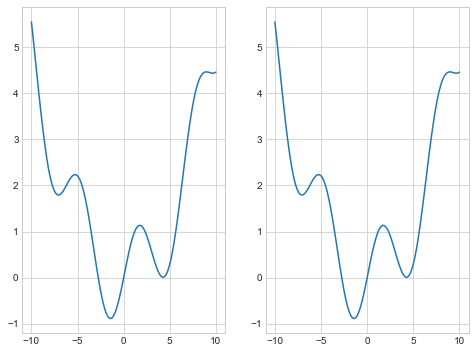

In [5]:
fig = plt.figure(figsize=(8, 6))

# (nrows, ncols, index)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(xs, ys)
ax2.plot(xs, ys)

#ax1.set_xlim([0,10])

In [77]:
from IPython import display
import time

def draw_optimization(xs, ys, optmize_xs, optmize_ys, bounds = []):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-4, 6)
    optmize_xs = np.array(optmize_xs)
    optmize_xs[optmize_xs > 10] = None
    ax.plot(xs, ys)
    
    for x_vline in bounds:
        ax.vlines(x_vline,-20,20, linestyles = 'dashed', color = 'black')
    
    for i, x in enumerate(optmize_xs):
        ax.plot(optmize_xs[i], optmize_ys[i], ls = '', marker = 'o')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.25)

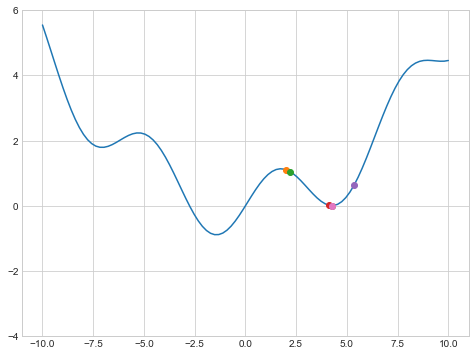

In [78]:
from scipy import optimize

optmize_xs = []
optmize_ys = []
def callback(xk):
    global optmize_xs
    global optmize_ys
    optmize_xs.append(xk[0])
    optmize_ys.append(f(xk[0]))

x_guess = 2
optmize_xs.append(x_guess)
optmize_ys.append(f(x_guess))

#options={'maxiter':5000},tol=1e-10
obj = lambda x: f(x)
#res = optimize.minimize(obj, x_guess, method='Nelder-Mead', callback = callback)
res = optimize.minimize(obj, x_guess, method='SLSQP', callback = callback)
x_best_scipy = res.x[0]
f_best_scipy = res.fun

draw_optimization(xs, ys, optmize_xs, optmize_ys)

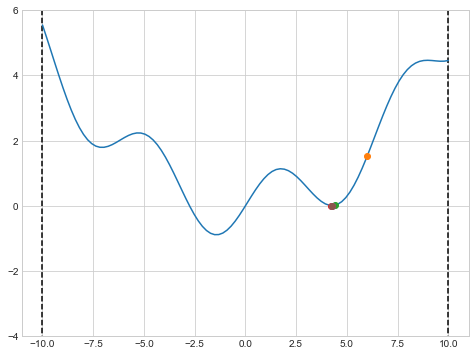

In [81]:
optmize_xs = []
optmize_ys = []
def callback(xk):
    global optmize_xs
    global optmize_ys
    optmize_xs.append(xk[0])
    optmize_ys.append(f(xk[0]))

x_guess = 6
optmize_xs.append(x_guess)
optmize_ys.append(f(x_guess))

#options={'maxiter':5000},tol=1e-10

bounds = [(-10,10)]

obj = lambda x: f(x)
#res = optimize.minimize(obj, x_guess, method='Nelder-Mead', callback = callback)
res = optimize.minimize(obj, x_guess, method='SLSQP', callback = callback, bounds = bounds)
x_best_scipy = res.x[0]
f_best_scipy = res.fun

draw_optimization(xs, ys, optmize_xs, optmize_ys, bounds[0])